![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Foundations of Machine Learning Frameworks
&nbsp; 

CSCN8010 - Winter 2024
&nbsp; 

Professor: Ran Feldesh
&nbsp;

Student: Arcadio de Paula Fernandez

# Practical Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

## Importing all the essential libraries and sub modules

In [1]:
!pip install pandas



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# 1. Introduction: A brief introduction to the problem and obtaining the data.

###  1.1. A brief introduction to the problem

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, MNIST dataset contains a lot of handwritten digits. It shares the same image size and structure of training and testing splits. The dataset Fashion-MNIST can be found on [Kaggle](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_test.csv).

### 1.2. Obtaining the Data

In [3]:
# Load the data

data_train = pd.read_csv(r"C:\Users\arcad\CSCN8010-labs\Lab8-Arca\fashion-mnist_train.csv")
data_test = pd.read_csv(r"C:\Users\arcad\CSCN8010-labs\Lab8-Arca\fashion-mnist_test.csv")


In [4]:
# Extract labels and images
train_labels = data_train['label']
train_images = data_train.drop('label', axis=1)

test_labels = data_test['label']
test_images = data_test.drop('label', axis=1)

# 2. Exploratory data analysis - EDA

### 2.1. Type and quantitative information about the data set

In [5]:
# Convert DataFrames to NumPy arrays for dtype inspection and shape
train_images_np = train_images.to_numpy()
test_images_np = test_images.to_numpy()

print(f'Image DType: {type(train_images_np)}') # This will show the type of the variable holding the images
print(f'Image Element DType: {train_images_np.dtype}') # This will show the data type of an individual element in the image array
print(f'Label Element DType: {train_labels.dtype}') # This shows the data type of an individual label

print('\n**Shapes:**')
print('Train Data:')
print(f'Images: {train_images_np.shape}') # Shape of the image data array
print(f'Labels: {train_labels.shape}') # Shape of the labels
print('Test Data:')
print(f'Images: {test_images_np.shape}') # Shape of the test image data array
print(f'Labels: {test_labels.shape}') # Shape of the test labels

print('\nImage Data Range:')
print(f'Min: {train_images_np.min()}') # Minimum pixel value in the training set
print(f'Max: {train_images_np.max()}') # Maximum pixel value in the training set


Image DType: <class 'numpy.ndarray'>
Image Element DType: int64
Label Element DType: int64

**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)

Image Data Range:
Min: 0
Max: 255


### 2.2. Plotting the two first images of the dataset

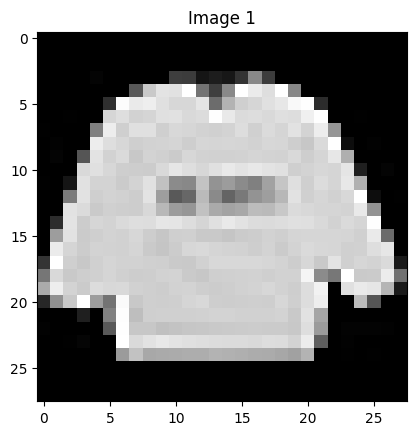

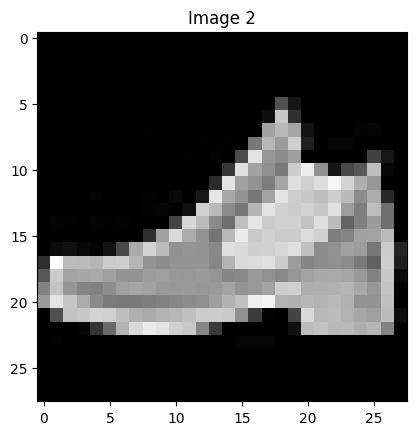

In [6]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(2): 
    image = train_images.iloc[i].to_numpy().reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.show()

In [7]:
# Convert the DataFrame to a numpy array 
X = train_images.to_numpy()  
y = train_labels.to_numpy()  


### 2.3. Visualization of the images in pixel data from grayscale 

In [8]:
def visualize_input(i, ax, y):
    img = X[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Digit no : {y[i]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

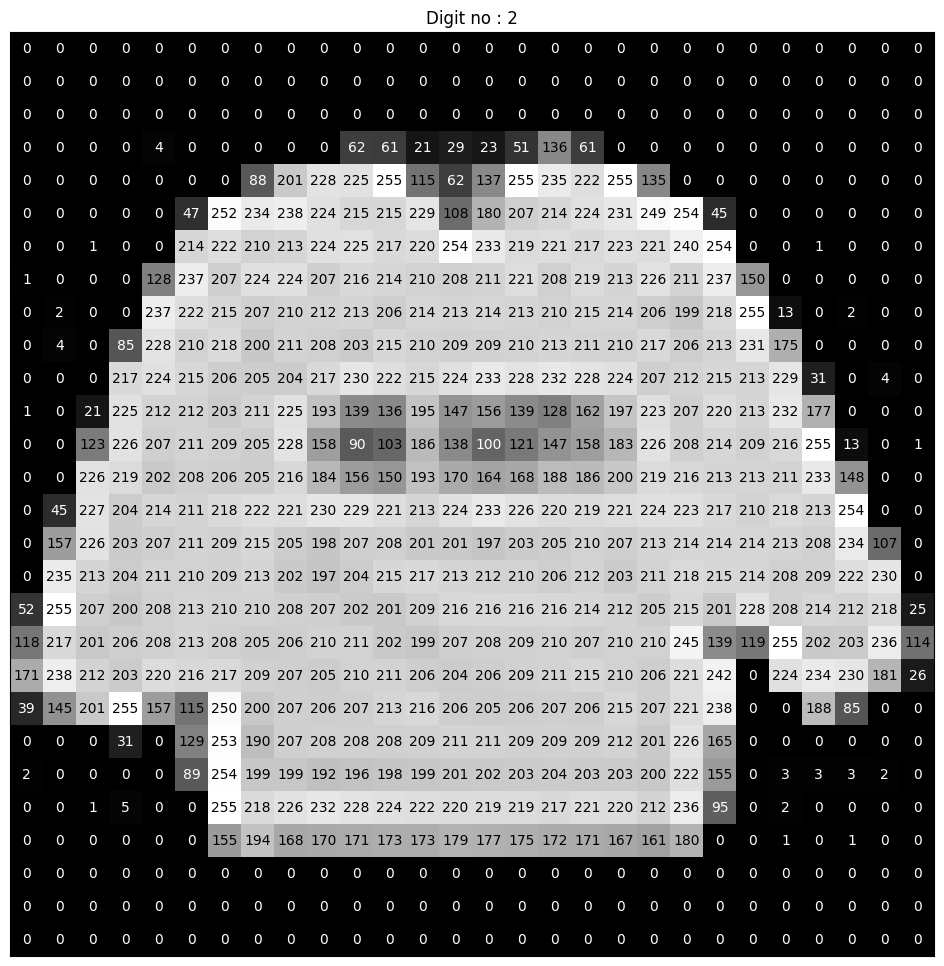

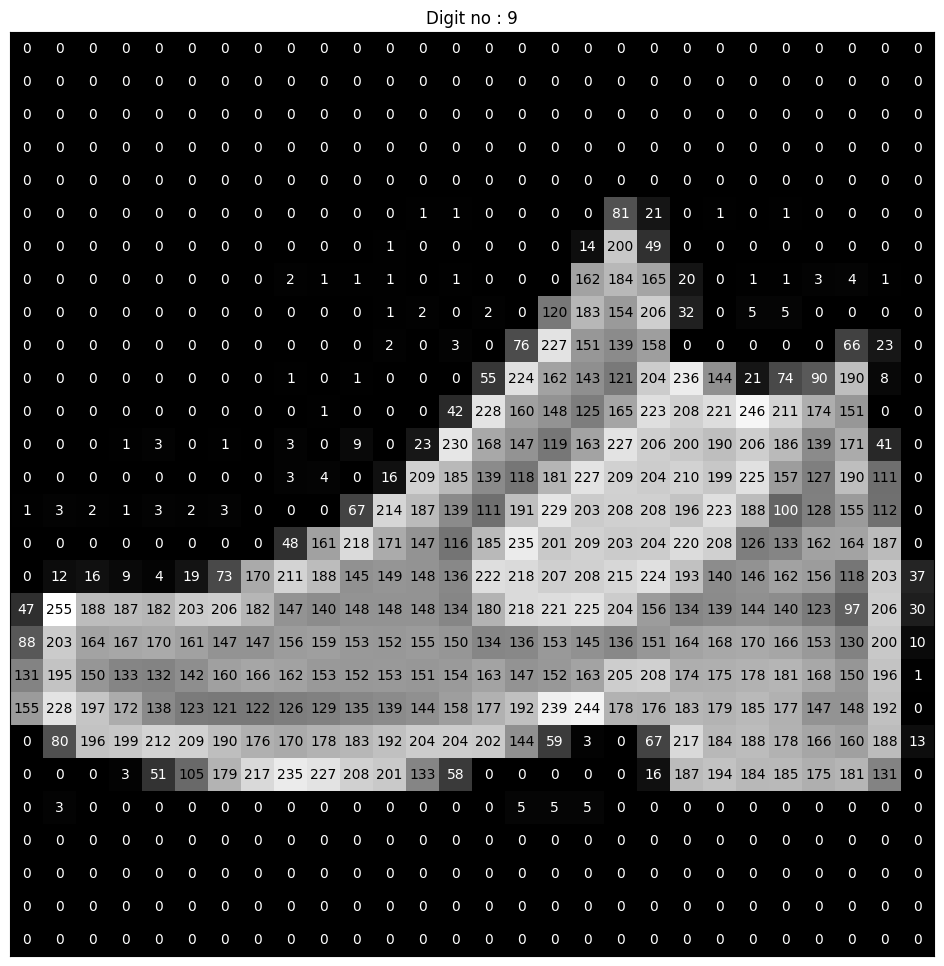

In [9]:
for i in range(2):  # Plot the first two images from the dataset
    fig, ax = plt.subplots(figsize=(12, 12))
    visualize_input(i, ax, y)  
    plt.show()



These images above are a visualization of pixel data from grayscale images, where each cell represents an individual pixel's intensity, ranging from 0 to 255. The numbers within the cells are the grayscale values—0 corresponds to black (no intensity), and 255 corresponds to white (full intensity).

### 2.4. The distribution of pixel values

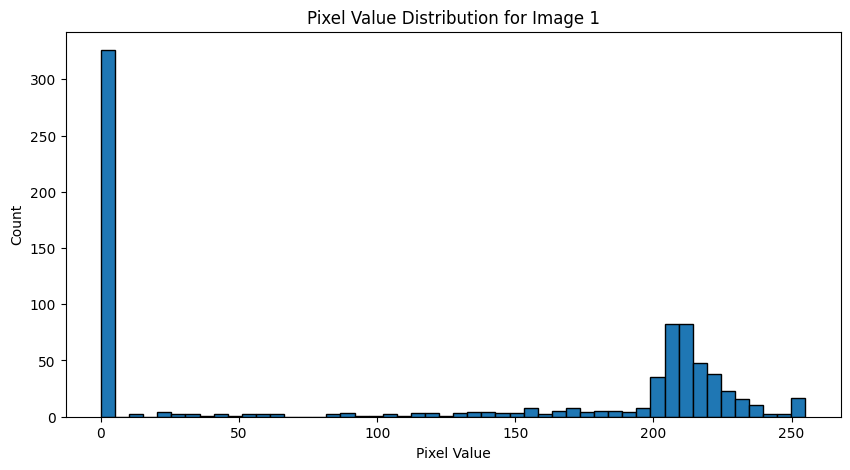

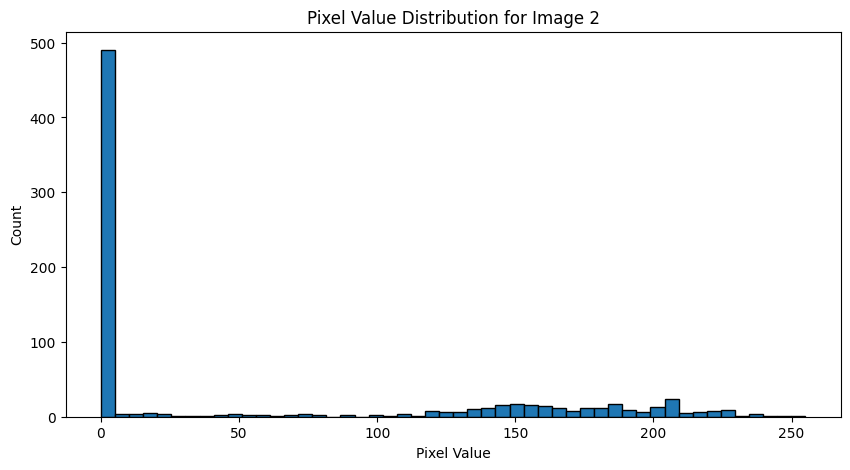

In [10]:
for i in range(2):  
   
    image = train_images.iloc[i].to_numpy().reshape(28, 28) 
    pixels = image.flatten() 

    # Plot the distribution of pixel values
    fig = plt.figure(figsize=(10, 5))
    plt.hist(pixels, bins=50, edgecolor='black')
    plt.title(f'Pixel Value Distribution for Image {i+1}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.show()


The histogram in the image represents the distribution of pixel values for the two images of the dataset and is useful for understanding the contrast and brightness of an image. 

The x-axis represents the pixel values ranging from 0 to 255. The value 0 corresponds to black, and 255 corresponds to white in a grayscale image.
The y-axis represents the count of pixels for each pixel value. In our two cases, many pixels have a value of 0, indicating a significant portion of the image is black, 

In image 1 the histogram also shows very few pixels with values close to 255, indicating few bright or white areas in the image.

In image 2 the histogram also shows very few pixels with values between 125 and 225, indicating fewer brightness areas.

### 2.5. Plotting with the average image for each label

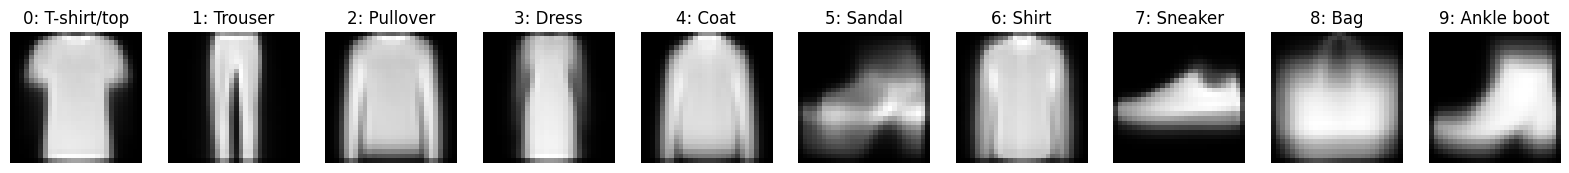

In [11]:
# Define the labels for the Fashion MNIST dataset
labels = {
    0: "0: T-shirt/top",
    1: "1: Trouser",
    2: "2: Pullover",
    3: "3: Dress",
    4: "4: Coat",
    5: "5: Sandal",
    6: "6: Shirt",
    7: "7: Sneaker",
    8: "8: Bag",
    9: "9: Ankle boot"
}

# Plot with the average image for each label
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y.astype('int8') == digit)[0]
    avg_image = np.mean(X[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(labels[digit])
    axes[digit].axis('off')
plt.show()

# 3. Preprocessing the Data

In [12]:
# Convert DataFrames to NumPy arrays
train_images_np = train_images.to_numpy()
test_images_np = test_images.to_numpy()

# Reshape the images
train_images_np = train_images_np.reshape((60000, 28 * 28))
test_images_np = test_images_np.reshape((10000, 28 * 28))

# Normalize the images
train_images_np = train_images_np.astype("float32") / 255
test_images_np = test_images_np.astype("float32") / 255


In [13]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# 4. Modeling

### 4.1. Choose a model: Define and Train a fully-connected feedforward neural network of your choice using Keras and Tensorflow. 

In our model we are going to use:
- A Dense layer ->  is a neural network layer where each neuron receives input from all the neurons of the previous layer, hence 'fully connected'.
- 512 ->  This is the number of neurons, or units, in this dense layer
- Relu ->  Rectified Linear Unit, which is the activation function used by all 512 neurons in this layer.
- In our case, the model expects each input to be a flat array of 784 elements (which likely corresponds to an image that's 28x28 pixels, flattened out).
- 10 ->  The number of neurons corresponds to the number of output classes
- The softmax activation function -> is used to convert the model's raw output scores into probabilities, so each neuron's output will have a probability ranging from 0 to 1. 

In [14]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Splitting the test set into validation and test sets (50% validation, 50% test)
validation_images, final_test_images, validation_labels, final_test_labels = train_test_split(
    test_images_np, test_labels, test_size=0.5, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(784,)), # Make sure to update input_shape if needed
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training set and validate with the validation set you just created
model.fit(train_images_np, train_labels, epochs=10, validation_data=(validation_images, validation_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4767 - accuracy: 0.8288 - val_loss: 0.3809 - val_accuracy: 0.8586
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3621 - accuracy: 0.8676 - val_loss: 0.3565 - val_accuracy: 0.8700
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3257 - accuracy: 0.8808 - val_loss: 0.3346 - val_accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2999 - accuracy: 0.8887 - val_loss: 0.3429 - val_accuracy: 0.8758
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.8950 - val_loss: 0.3127 - val_accuracy: 0.8830
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9002 - val_loss: 0.3044 - val_accuracy: 0.8882
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2560 - accuracy: 0.9043 - val_loss: 0.3159 - val_accuracy:

The training loss decreases over time, indicating that the model is learning and improving its performance on the training dataset.
The training accuracy increases over time, which is also a good sign that the model is learning.
The highest validation accuracy is reached at epoch 9 (89.18%).
There is a slight increase in validation loss after epoch 5, which might be an early sign of overfitting. 

# 5. Evaluation

### 5.1. Evaluate the model using the validation dataset. (accuracy, precision, recall, F1). 

In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the validation dataset
validation_predictions = model.predict(validation_images)

# Convert predictions from one-hot encoded vectors to class labels
validation_predictions_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = np.argmax(validation_labels, axis=1)

# Evaluate the model on the validation dataset for accuracy directly using model.evaluate
validation_loss, validation_accuracy = model.evaluate(validation_images, validation_labels, verbose=0)

# Use scikit-learn to calculate precision, recall, and F1 score
report = classification_report(validation_true_labels, validation_predictions_labels, target_names=[f"Class {i}" for i in range(10)], output_dict=True)

# Extracting precision, recall, and F1 score for each class and the average (weighted)
print(f"Validation Accuracy: {validation_accuracy:.4f}")
for i, class_name in enumerate([f"Class {i}" for i in range(10)]):
    print(f"{class_name} - Precision: {report[class_name]['precision']:.4f}, Recall: {report[class_name]['recall']:.4f}, F1: {report[class_name]['f1-score']:.4f}")
print(f"Average (Weighted) - Precision: {report['weighted avg']['precision']:.4f}, Recall: {report['weighted avg']['recall']:.4f}, F1: {report['weighted avg']['f1-score']:.4f}")

# Alternatively, if you want to print out the overall scores directly:
print("\nOverall Evaluation Metrics:")
print(f"Accuracy: {validation_accuracy:.4f}")
print(f"Precision (Weighted Avg.): {report['weighted avg']['precision']:.4f}")
print(f"Recall (Weighted Avg.): {report['weighted avg']['recall']:.4f}")
print(f"F1-Score (Weighted Avg.): {report['weighted avg']['f1-score']:.4f}")



157/157 [==============================] - 0s 728us/step
Validation Accuracy: 0.8922
Class 0 - Precision: 0.8024, Recall: 0.8947, F1: 0.8461
Class 1 - Precision: 0.9729, Recall: 0.9921, F1: 0.9824
Class 2 - Precision: 0.8626, Recall: 0.7466, F1: 0.8004
Class 3 - Precision: 0.9261, Recall: 0.8984, F1: 0.9120
Class 4 - Precision: 0.7619, Recall: 0.9218, F1: 0.8343
Class 5 - Precision: 0.9574, Recall: 0.9630, F1: 0.9602
Class 6 - Precision: 0.7954, Recall: 0.6386, F1: 0.7084
Class 7 - Precision: 0.9585, Recall: 0.9014, F1: 0.9291
Class 8 - Precision: 0.9661, Recall: 0.9837, F1: 0.9748
Class 9 - Precision: 0.9297, Recall: 0.9780, F1: 0.9532
Average (Weighted) - Precision: 0.8936, Recall: 0.8922, F1: 0.8905

Overall Evaluation Metrics:
Accuracy: 0.8922
Precision (Weighted Avg.): 0.8936
Recall (Weighted Avg.): 0.8922
F1-Score (Weighted Avg.): 0.8905


The report on the performance of your model on the validation dataset, shows us that the classes 1, 3, 5, 8 and 9 high precision and recall suggest the model performs well with these classes.Class 6 has the lowest precision and recall, indicating the model struggles with this category. 

The F1-score weighted average of 0.8871 is a harmonic mean of precision and recall and indicates overall balanced performance between the two metrics.

The average weighted precision is 0.8898, meaning when the model predicts any class, it is correct about 88.98% of the time. 

The model is quite accurate with an overall accuracy of 88.78. 

# 5.2. Run the model on the test set, and provide clear and relevant conclusions

In [16]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make predictions on the final test set
predictions = model.predict(final_test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(final_test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Generate a classification report for precision, recall, and F1-score
report = classification_report(true_classes, predicted_classes)

print(f"Accuracy: {accuracy}")
print(report)


157/157 [==============================] - 0s 769us/step
Accuracy: 0.8896
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       487
           1       0.97      0.99      0.98       493
           2       0.83      0.77      0.80       487
           3       0.91      0.91      0.91       498
           4       0.76      0.88      0.82       514
           5       0.96      0.96      0.96       487
           6       0.81      0.59      0.68       513
           7       0.96      0.93      0.94       513
           8       0.98      0.98      0.98       508
           9       0.95      0.97      0.96       500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



The overall accuracy of the model on the test set is 0.891, which is high and suggests that the model is reliable in its predictions. Class 1 and 8 show exceptionally high performance across all metrics, suggesting that the model is particularly good at recognizing these items. Class 6  has the lowest F1-score, which is a harmonic mean of precision and recall. This implies that this class is the most challenging for the model. 

# 6. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

![Precison and recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

Increasing the precision for class 5 without changing the model or retraining involves adjusting the decision threshold. By default, the threshold to a certain class is 0.5, so we are going to increase this threshold to 0.7.

Increasing the threshold will improve precision for class by reducing the number of false positives, it can also decrease the recall by failing to identify some true positives. 

In [17]:
import numpy as np

def adjust_predictions(predictions, class_index, new_threshold):
   
    adjusted_classes = np.argmax(predictions, axis=1)  # Get original class predictions
    class_probabilities = predictions[:, class_index]  # Probabilities for the specified class

    # Identify where adjustments are needed
    needs_adjustment = (class_probabilities >= new_threshold) & (adjusted_classes != class_index)

    # Apply adjustments
    adjusted_classes[needs_adjustment] = class_index

    return adjusted_classes

# Example usage
predictions = model.predict(final_test_images)  # Your model's predictions

# Adjust predictions for class '5' with a new, higher threshold, e.g., 0.7
new_threshold = 0.7
adjusted_classes = adjust_predictions(predictions, class_index=5, new_threshold=new_threshold)

# Evaluate the adjusted predictions
from sklearn.metrics import classification_report
true_classes = np.argmax(final_test_labels, axis=1)
print(classification_report(true_classes, adjusted_classes))


157/157 [==============================] - 0s 725us/step
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       487
           1       0.97      0.99      0.98       493
           2       0.83      0.77      0.80       487
           3       0.91      0.91      0.91       498
           4       0.76      0.88      0.82       514
           5       0.96      0.96      0.96       487
           6       0.81      0.59      0.68       513
           7       0.96      0.93      0.94       513
           8       0.98      0.98      0.98       508
           9       0.95      0.97      0.96       500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In the validation set class 5 precision is 0.9700 and now it increase to 0.99.

# 7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

Increasing the reccal for class 5 without changing the model or retraining involves adjusting the decision threshold. By default, the threshold to a certain class is 0.5, so we are going to decrease this threshold to 0.3.

Decreasing the threshold will improve recall for class by increasing the false positive rate. 

In [18]:
import numpy as np

# Predictions from the model
predictions = model.predict(final_test_images)

# Original threshold: picking the class with the max probability
original_predicted_classes = np.argmax(predictions, axis=1)

# Adjusted threshold for class 5
class_5_threshold = 0.3  
adjusted_predicted_classes = np.copy(original_predicted_classes)

# Apply the adjusted threshold for class '5'
for i, prediction in enumerate(predictions):
    if prediction[5] > class_5_threshold:
        adjusted_predicted_classes[i] = 5  # Reassign to class '5' if above threshold

# Now, you can calculate the recall for class '5' as well as for other classes if needed
from sklearn.metrics import classification_report

true_classes = np.argmax(final_test_labels, axis=1)
adjusted_report = classification_report(true_classes, adjusted_predicted_classes, digits=3)

print("Adjusted Classification Report:")
print(adjusted_report)


157/157 [==============================] - 0s 804us/step
Adjusted Classification Report:
              precision    recall  f1-score   support

           0      0.772     0.920     0.840       487
           1      0.972     0.992     0.982       493
           2      0.835     0.768     0.800       487
           3      0.913     0.906     0.909       498
           4      0.764     0.881     0.818       514
           5      0.953     0.967     0.960       487
           6      0.810     0.591     0.683       513
           7      0.963     0.926     0.944       513
           8      0.982     0.984     0.983       508
           9      0.945     0.968     0.957       500

    accuracy                          0.890      5000
   macro avg      0.891     0.890     0.888      5000
weighted avg      0.891     0.890     0.887      5000



In the validation set class 5 recall is 0.9454 and now it increase to 0.965.